# Predicting Customer Churn in the Telecom Industry

Customer attrition (a.k.a customer churn) is one of the biggest expenditures of any organization. If we could figure out why a customer leaves and when they leave with reasonable accuracy, it would immensely help the organization to strategize their retention initiatives manifold. 

As perceive myself as a data scientist in the telecommunication industry, to help the organization in dealing with customer attrition by building a machine learning model to **predict the likelihood of a customer leaving the company.** This will in turn help the company minimize the rate at which customers leave and increase their customer retention rate. This analysis is done based on historical data of customers. 

I will be using supervised machine learning algorithms to build thsi model. This dataset was extracted from IBM
**IBM Cognos Analytics 11.1.3+ base samples dataset**

**Context**

A fictional telco company that provided home phone and Internet services to 7043 customers in California. 

**Data Description**

Data Description
7043 observations with 33 variables

CustomerID: A unique ID that identifies each customer.

Gender: The customer’s gender: Male, Female

Senior Citizen: Indicates if the customer is 65 or older: Yes, No

Partner: Indicate if the customer has a partner: Yes, No

Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

Tenure Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.

Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No

Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

Device Protection: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No

Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.

Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

Churn: Yes = the customer left the company. No = the customer remained with the company.

In [1]:
#importing libraries 
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy
from scipy.stats import chisquare
from bioinfokit.analys import stat
%matplotlib inline 

pd.set_option('display.max_colwidth', None) #to display all columns in the dataframe
pd.set_option('display.max_columns', None )

In [2]:
#loading the data
data=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data exploration 

In [3]:
#shape of data 
print('The dataset has {} columns and {} rows'.format(data.shape[1], data.shape[0]))

The dataset has 21 columns and 7043 rows


it seems all the columns are in the correct data format. So there is no need to scrutinize it by changing data type

In [4]:
#converting the total charges object datatype to float
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors = 'coerce')


In [5]:
#checking if there are null values in the dataset
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are no null values in the dataset, we are good to go. huurraaaay!!|

In [6]:
#descriptive statistics of the numerical data 
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


From the descriptive stats, it can be observed that, the  monthly charge ranges from 0.00 to 118.75 and the average monthly charge is 64.76. The higest number of months spent in the industry is 72 months and the minimum being 0. 

In [7]:
#dropping missing values in the total charges column
data.dropna(inplace=True)

In [8]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Exploring The Categorical Variables

In [9]:
#deleting the customer ID column since it is not providing any info
data.drop(columns=['customerID'], inplace=True)

In [10]:
categorical=data.select_dtypes(include=['object'])
for cat in categorical:
    print(cat)

gender
Partner
Dependents
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
Churn


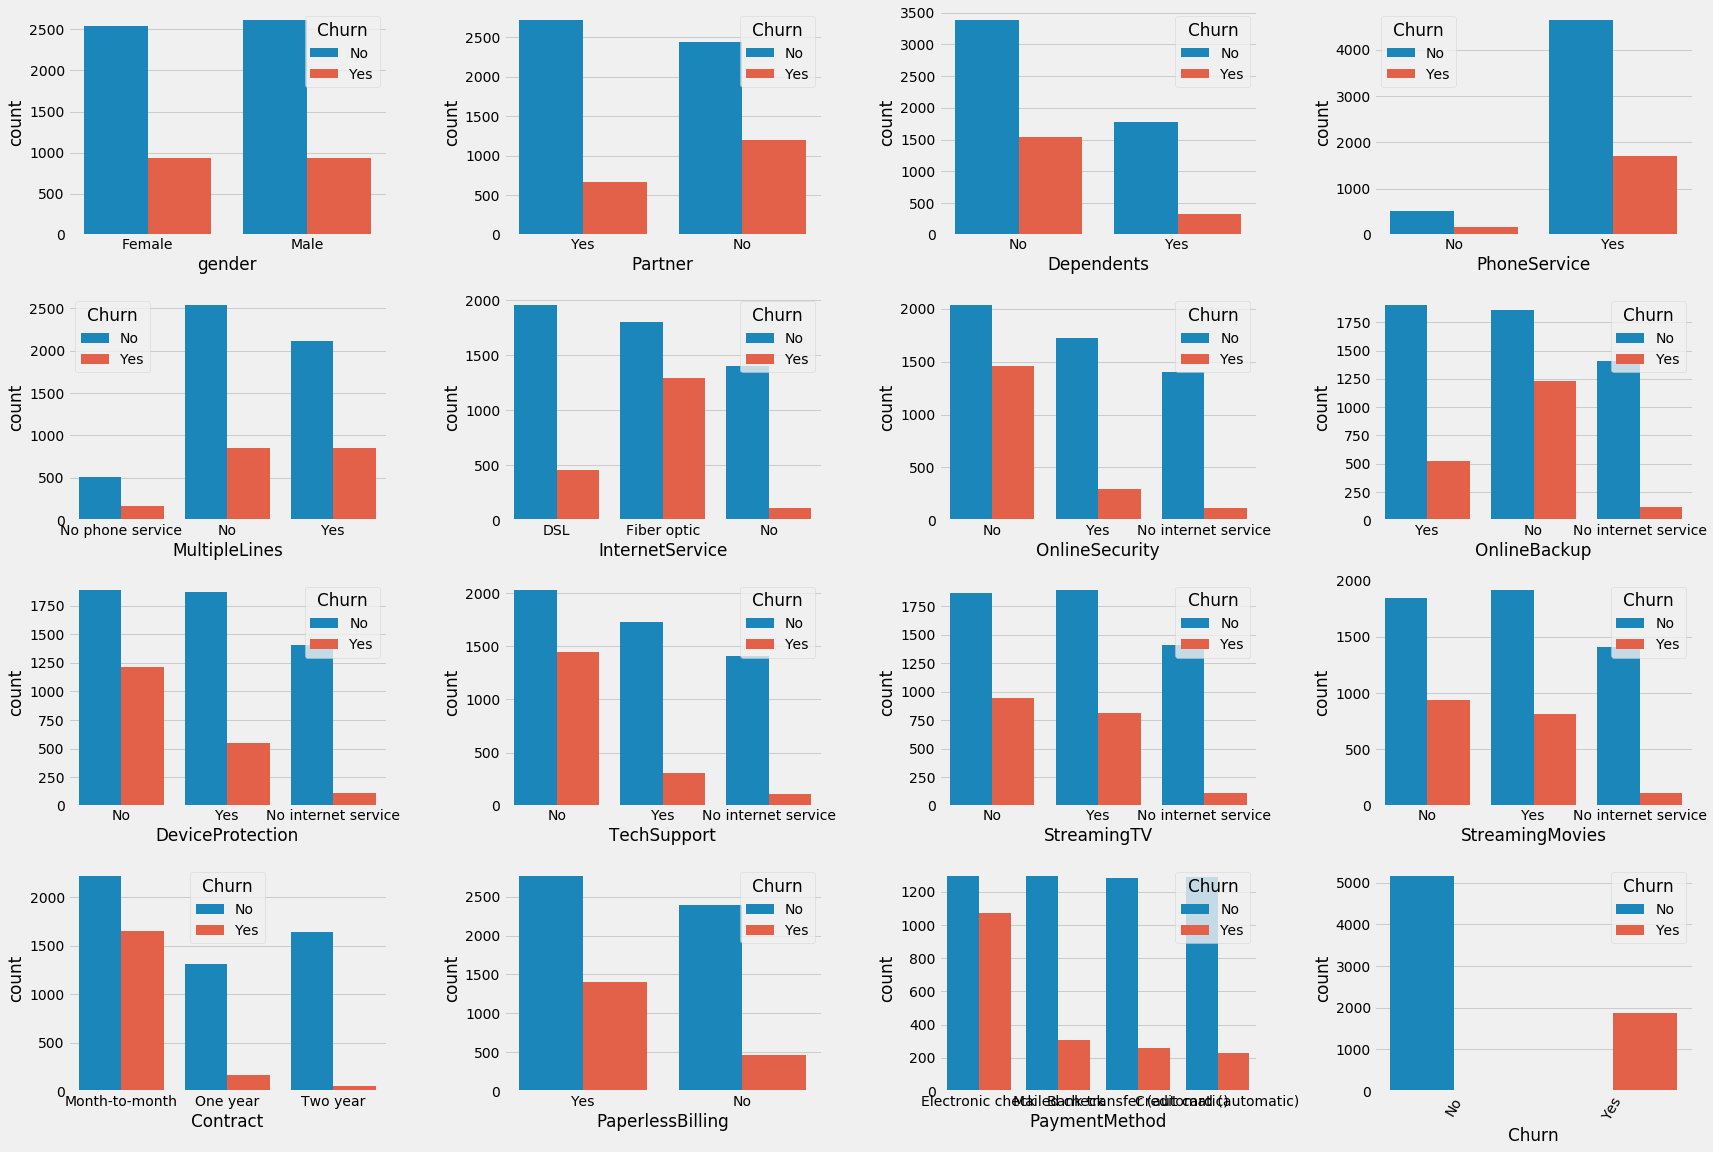

In [11]:
import matplotlib.style as style
style.use('fivethirtyeight')
fig,axes = plt.subplots(4,4, figsize=(24,16))
for index,cat in enumerate(categorical):
    row,col = index//4,index%4
    sns.countplot(x=cat,data=data,hue='Churn',ax=axes[row,col])
    
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.xticks(rotation=60)
plt.show()

### Univariate Analysis of Categprical Variables

In [12]:
def cat_explore(df, x):
    print('Unique values in {} column'.format(x))
    print(df[x].nunique())
    print('='*30)
    print('Number of records')

    print(df[x].value_counts())
    print('='*30)
    print(sns.countplot(df[x]).set_title('Distribution of {}'.format(x)))

Unique values in gender column
2
Number of records
Male      3549
Female    3483
Name: gender, dtype: int64
Text(0.5, 1.0, 'Distribution of gender')


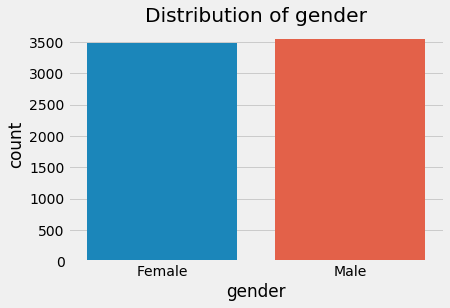

In [13]:
cat_explore(data, 'gender')

Unique values in Partner column
2
Number of records
No     3639
Yes    3393
Name: Partner, dtype: int64
Text(0.5, 1.0, 'Distribution of Partner')


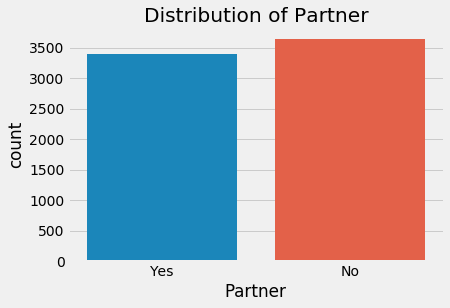

In [14]:
cat_explore(data, 'Partner')

Unique values in Dependents column
2
Number of records
No     4933
Yes    2099
Name: Dependents, dtype: int64
Text(0.5, 1.0, 'Distribution of Dependents')


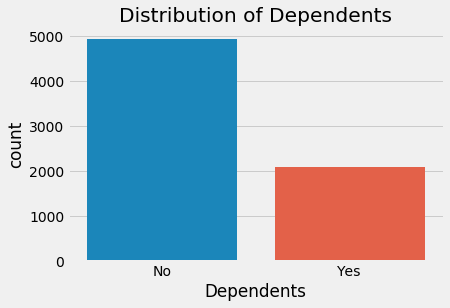

In [15]:
cat_explore(data, 'Dependents')

Unique values in PhoneService column
2
Number of records
Yes    6352
No      680
Name: PhoneService, dtype: int64
Text(0.5, 1.0, 'Distribution of PhoneService')


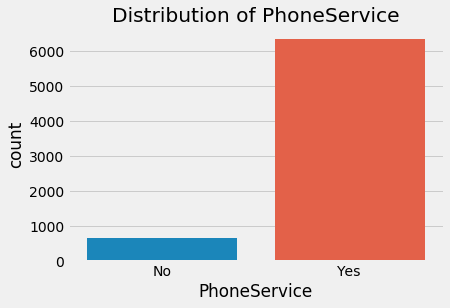

In [16]:
cat_explore(data, 'PhoneService')

Unique values in MultipleLines column
3
Number of records
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64
Text(0.5, 1.0, 'Distribution of MultipleLines')


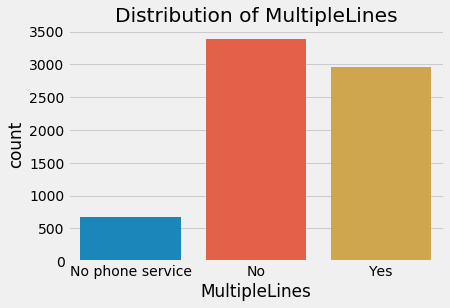

In [17]:
cat_explore(data, 'MultipleLines')

Unique values in OnlineSecurity column
3
Number of records
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64
Text(0.5, 1.0, 'Distribution of OnlineSecurity')


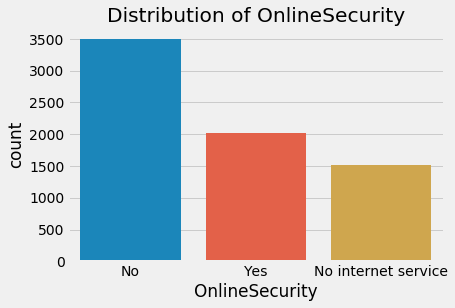

In [18]:
cat_explore(data, 'OnlineSecurity')

Unique values in OnlineBackup column
3
Number of records
No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64
Text(0.5, 1.0, 'Distribution of OnlineBackup')


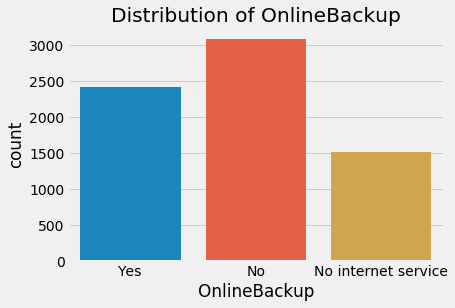

In [19]:
cat_explore(data, 'OnlineBackup')

Unique values in DeviceProtection column
3
Number of records
No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64
Text(0.5, 1.0, 'Distribution of DeviceProtection')


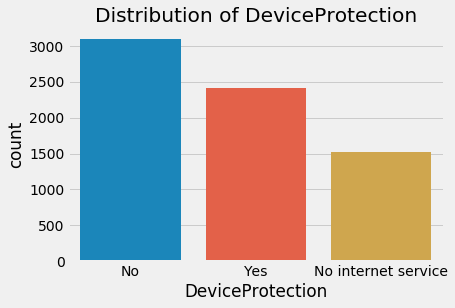

In [20]:
cat_explore(data, 'DeviceProtection')

Unique values in TechSupport column
3
Number of records
No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64
Text(0.5, 1.0, 'Distribution of TechSupport')


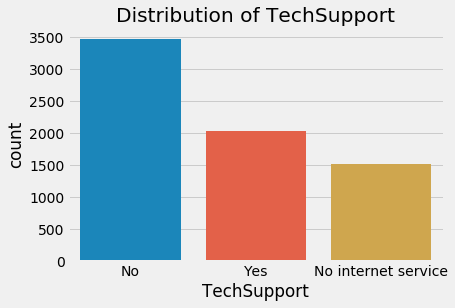

In [21]:
cat_explore(data, 'TechSupport')

Unique values in StreamingTV column
3
Number of records
No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64
Text(0.5, 1.0, 'Distribution of StreamingTV')


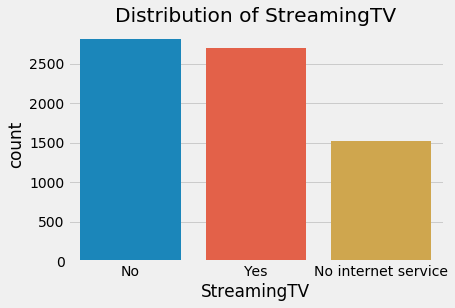

In [22]:
cat_explore(data, 'StreamingTV')

Unique values in StreamingMovies column
3
Number of records
No                     2781
Yes                    2731
No internet service    1520
Name: StreamingMovies, dtype: int64
Text(0.5, 1.0, 'Distribution of StreamingMovies')


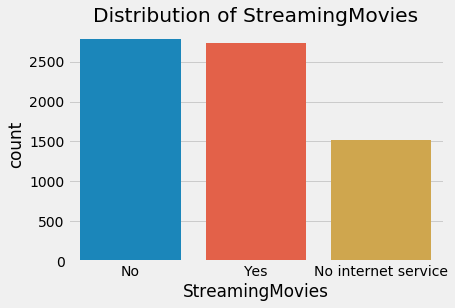

In [23]:
cat_explore(data, 'StreamingMovies')

Unique values in Contract column
3
Number of records
Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64
Text(0.5, 1.0, 'Distribution of Contract')


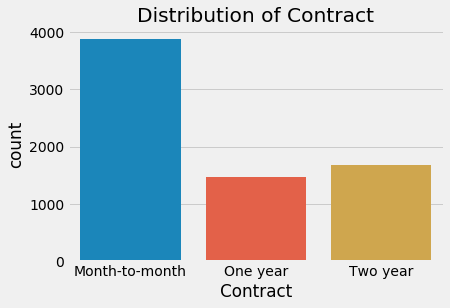

In [24]:
cat_explore(data, 'Contract')

Unique values in PaperlessBilling column
2
Number of records
Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64
Text(0.5, 1.0, 'Distribution of PaperlessBilling')


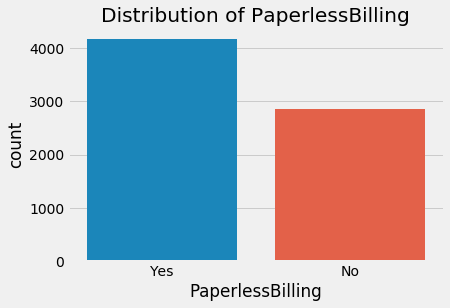

In [25]:
cat_explore(data, 'PaperlessBilling')

Unique values in PaymentMethod column
4
Number of records
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64
Text(0.5, 1.0, 'Distribution of PaymentMethod')


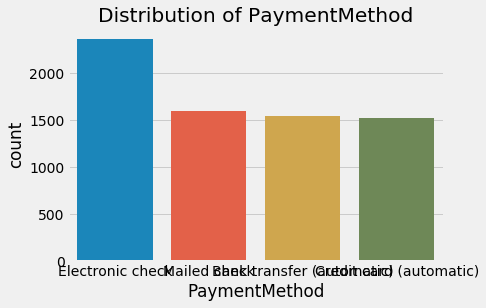

In [26]:
cat_explore(data, 'PaymentMethod')

In [27]:
data.keys()

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### Relationship Between Categorical Variables and the Target Variable

** Here we will use statistical concepts like chi square and crosstabulation to find the relationship between variables

In [28]:
#defining a function for categorical variables
def explore_relationship(df, x, y):
    cross_tab=pd.crosstab(df[x], df[y])
    print('======================================================')
    test=stat()
    test.chisq(df=cross_tab)
    print(test.summary)
    print('Null Hypothesis: {} and {} are independent'.format(x,y))
    print('Altenate Hypothesis: {} and {} are not independent'.format(x,y))
    print('======================================================')
    print('Relationship Between {} and {}'.format(x,y))
    print(pd.crosstab(df[x], df[y]))
    pd.crosstab(df[x], df[y]).plot.bar()
    

#### Gender and Churn


Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            1      0.475455   0.490488
Log-likelihood     1      0.47544    0.490495

Null Hypothesis: gender and Churn are independent
Altenate Hypothesis: gender and Churn are not independent
Relationship Between gender and Churn
Churn     No  Yes
gender           
Female  2544  939
Male    2619  930


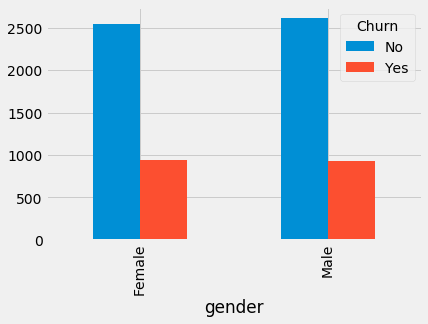

In [29]:
explore_relationship(data,'gender','Churn')

From the output of the chi square, since the p value (0.486579)>0.05, we fail to reject the null hypothesis at 5% significance level and conclude that gender and churn are independent. This means that, a person being male or female does no have a relationshi with leaving the company or not. The output of the crosstabulation and the graph depicts same

#### Partner and Churn 


Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            1       157.503  3.9738e-36
Log-likelihood     1       159.399  1.53129e-36

Null Hypothesis: Partner and Churn are independent
Altenate Hypothesis: Partner and Churn are not independent
Relationship Between Partner and Churn
Churn      No   Yes
Partner            
No       2439  1200
Yes      2724   669


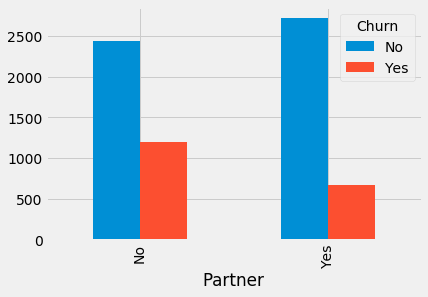

In [30]:
explore_relationship(data,'Partner','Churn')

Here the p value is less than 0.05 and so we reject the null hypothesis at 5% significance level and conclude that, Partner and churn are dependent. Thus, a person having a partner or not have an influence on leaving the telcom or not. 
The output of the cross tabulation and the graph gives us a clearer view of this. customers without partners are likely to leave as compared to their counterparts. 

#### Dependents and Churn


Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            1       186.322  2.01966e-42
Log-likelihood     1       199.793  2.31791e-45

Null Hypothesis: Dependents and Churn are independent
Altenate Hypothesis: Dependents and Churn are not independent
Relationship Between Dependents and Churn
Churn         No   Yes
Dependents            
No          3390  1543
Yes         1773   326


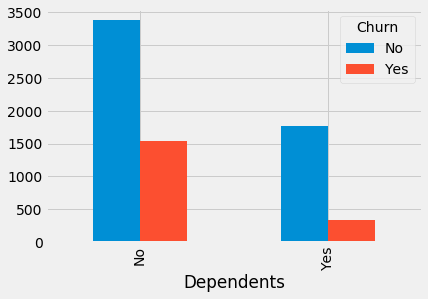

In [31]:
explore_relationship(data,'Dependents','Churn')

Here also, the p value is less than 0.05 and so we reject the null hypothesis at 5% significance level. Thus Partner and churn are dependent. Thus, a person having dependents or not have an influence on leaving the telcom or not. The output of the cross tabulation and the graph gives us a clearer view of this. customers without dependents are likely to leave as compared to their counterparts.

#### PhoneService and Churn


Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            1      0.873733   0.349924
Log-likelihood     1      0.883463   0.347255

Null Hypothesis: PhoneService and Churn are independent
Altenate Hypothesis: PhoneService and Churn are not independent
Relationship Between PhoneService and Churn
Churn           No   Yes
PhoneService            
No             510   170
Yes           4653  1699


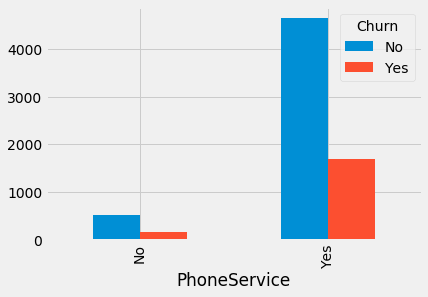

In [32]:
explore_relationship(data,'PhoneService','Churn')

From the output of the chi square, the p value (0.338783)>0.05, we therefore, fail to reject the null hypothesis at 5% significance level and conclude that gender and churn are independent. This means that, phone services has no relationship with churn. This is evident in the output of the crosstabulation and the graph.

#### Multiple Lines and Churn


Chi-squared test for independence

Test              Df    Chi-square     P-value
--------------  ----  ------------  ----------
Pearson            2       11.2715  0.00356793
Log-likelihood     2       11.2281  0.0036463

Null Hypothesis: MultipleLines and Churn are independent
Altenate Hypothesis: MultipleLines and Churn are not independent
Relationship Between MultipleLines and Churn
Churn               No  Yes
MultipleLines              
No                2536  849
No phone service   510  170
Yes               2117  850


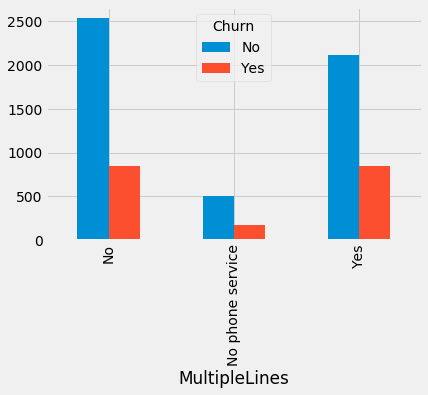

In [33]:
explore_relationship(data,'MultipleLines','Churn')

p value is less than 0.05. We reject the null hypothesis at 5% significance level and coclude that, Multiple Lines and Churn are dependent. A person having multiple lines or not has a relationship with churn. customers with multiple lines are likely to leave as compared to those without.

#### Online Security and Churn


Chi-squared test for independence

Test              Df    Chi-square       P-value
--------------  ----  ------------  ------------
Pearson            2       846.677  1.40069e-184
Log-likelihood     2       907.525  8.57846e-198

Null Hypothesis: OnlineSecurity and Churn are independent
Altenate Hypothesis: OnlineSecurity and Churn are not independent
Relationship Between OnlineSecurity and Churn
Churn                  No   Yes
OnlineSecurity                 
No                   2036  1461
No internet service  1407   113
Yes                  1720   295


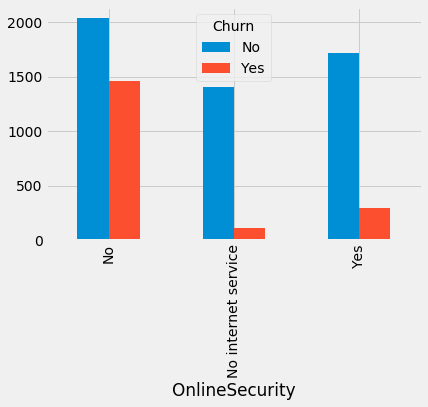

In [34]:
explore_relationship(data,'OnlineSecurity','Churn')

Here too we reject the null hypothesis since the p value is less than 0.05 and go ahead to reject the null hypothesis at 5% significance level. Customers without online security service are at a more likely to leave the company. 

#### Online Backup and Churn


Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            2       599.175  7.7761e-131
Log-likelihood     2       656.212  3.2015e-143

Null Hypothesis: OnlineBackup and Churn are independent
Altenate Hypothesis: OnlineBackup and Churn are not independent
Relationship Between OnlineBackup and Churn
Churn                  No   Yes
OnlineBackup                   
No                   1854  1233
No internet service  1407   113
Yes                  1902   523


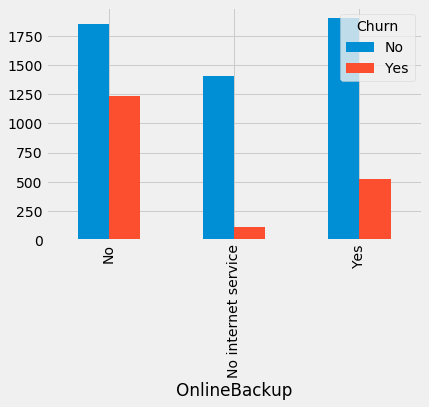

In [35]:
explore_relationship(data,'OnlineBackup','Churn')

We reject the null hyothesis at 5% level of significance and conclude that, online backup is related to churn. Customers without backup are at a likelihood of leaving the company. 


Chi-squared test for independence

Test              Df    Chi-square       P-value
--------------  ----  ------------  ------------
Pearson            2       555.88   1.95939e-121
Log-likelihood     2       615.782  1.92572e-134

Null Hypothesis: DeviceProtection and Churn are independent
Altenate Hypothesis: DeviceProtection and Churn are not independent
Relationship Between DeviceProtection and Churn
Churn                  No   Yes
DeviceProtection               
No                   1883  1211
No internet service  1407   113
Yes                  1873   545


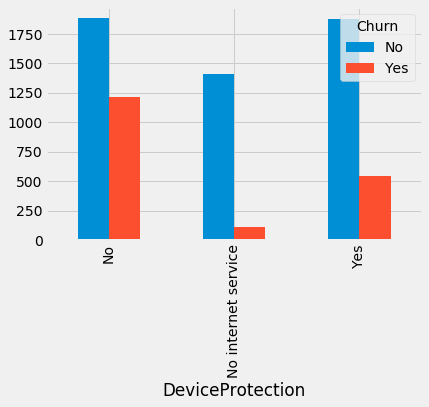

In [36]:
explore_relationship(data,'DeviceProtection','Churn')

We reject the null hyothesis at 5% level of significance and conclude that, online device protection is related to churn. Customers without backup are at a likelihood of leaving the company


Chi-squared test for independence

Test              Df    Chi-square       P-value
--------------  ----  ------------  ------------
Pearson            2       824.926  7.40781e-180
Log-likelihood     2       884.243  9.7514e-193

Null Hypothesis: TechSupport and Churn are independent
Altenate Hypothesis: TechSupport and Churn are not independent
Relationship Between TechSupport and Churn
Churn                  No   Yes
TechSupport                    
No                   2026  1446
No internet service  1407   113
Yes                  1730   310


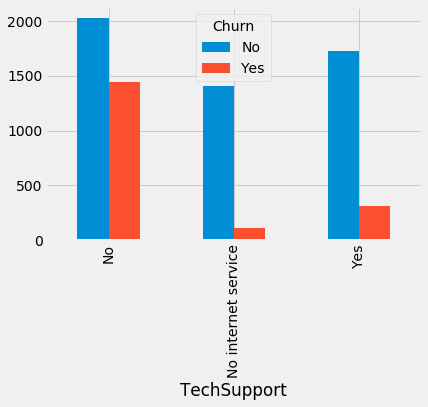

In [37]:
explore_relationship(data,'TechSupport','Churn')

p value is less than 0.05. We reject the null hypothesis at 5% significance level and conclude that, technical support and Churn are dependent. customers without technical support are likely to leave as compared to those with technical support.


Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            2       372.457  1.32464e-81
Log-likelihood     2       447.271  7.52252e-98

Null Hypothesis: StreamingTV and Churn are independent
Altenate Hypothesis: StreamingTV and Churn are not independent
Relationship Between StreamingTV and Churn
Churn                  No  Yes
StreamingTV                   
No                   1867  942
No internet service  1407  113
Yes                  1889  814


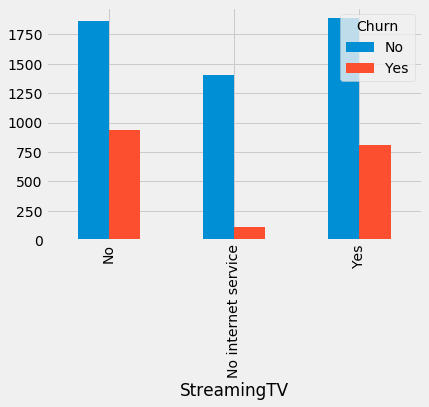

In [38]:
explore_relationship(data,'StreamingTV', 'Churn' )

We reject the null hyothesis at 5% level of significance and conclude that, streaming tv has a relationship with churning. Customers who doesnot use their internet services to stream online from third parties are likely to leave the company


Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            2       374.268  5.35356e-82
Log-likelihood     2       448.9    3.33127e-98

Null Hypothesis: StreamingMovies and Churn are independent
Altenate Hypothesis: StreamingMovies and Churn are not independent
Relationship Between StreamingMovies and Churn
Churn                  No  Yes
StreamingMovies               
No                   1843  938
No internet service  1407  113
Yes                  1913  818


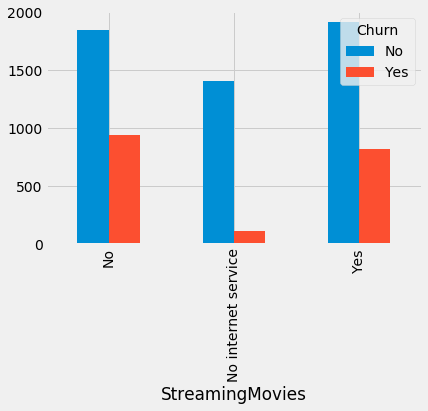

In [39]:
explore_relationship(data,'StreamingMovies', 'Churn' )

We reject the null hyothesis at 5% level of significance and conclude that, streaming tv has a relationship with churning. Customers who do not use their internet services to stream movies from third parties are likely to leave the company




Chi-squared test for independence

Test              Df    Chi-square       P-value
--------------  ----  ------------  ------------
Pearson            2       1179.55  7.32618e-257
Log-likelihood     2       1380.83  1.4309e-300

Null Hypothesis: Contract and Churn are independent
Altenate Hypothesis: Contract and Churn are not independent
Relationship Between Contract and Churn
Churn             No   Yes
Contract                  
Month-to-month  2220  1655
One year        1306   166
Two year        1637    48


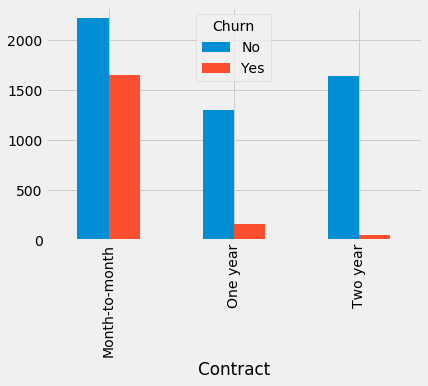

In [40]:
explore_relationship(data,'Contract', 'Churn' )

Customers whose contract type is a month-to-month contract is at a higher likelihood of churning as compared to those with annual contracts. 
The null hpothesis is rejected at 5% significance level. There is a relationship between contract and churn


Chi-squared test for independence

Test              Df    Chi-square     P-value
--------------  ----  ------------  ----------
Pearson            1       256.875  8.2362e-58
Log-likelihood     1       267.945  3.1821e-60

Null Hypothesis: PaperlessBilling and Churn are independent
Altenate Hypothesis: PaperlessBilling and Churn are not independent
Relationship Between PaperlessBilling and Churn
Churn               No   Yes
PaperlessBilling            
No                2395   469
Yes               2768  1400


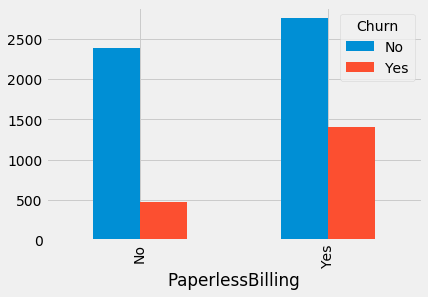

In [41]:
explore_relationship(data,'PaperlessBilling', 'Churn' )

The null hypothesis is rejected at 5% level of significance. people who uses paperless billing usually leaves the company as commpared to those without paperless billing


Chi-squared test for independence

Test              Df    Chi-square       P-value
--------------  ----  ------------  ------------
Pearson            3       645.43   1.42631e-139
Log-likelihood     3       624.764  4.3123e-135

Null Hypothesis: PaymentMethod and Churn are independent
Altenate Hypothesis: PaymentMethod and Churn are not independent
Relationship Between PaymentMethod and Churn
Churn                        No   Yes
PaymentMethod                        
Bank transfer (automatic)  1284   258
Credit card (automatic)    1289   232
Electronic check           1294  1071
Mailed check               1296   308


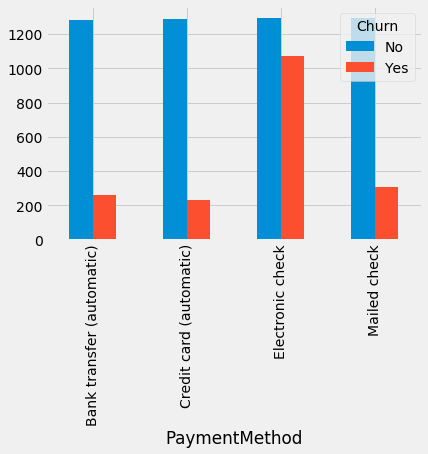

In [42]:
explore_relationship(data,'PaymentMethod', 'Churn')

Payemnt method has a relationship with the target variable (churn) since the p value is less than 0.05. customers that uses electronic check usually leaves the company.

### Exploring Numerical Variables

In [43]:
#extracting only numerical variables
numerical=data.select_dtypes(include=np.number)
for num in numerical:
    print(num)

SeniorCitizen
tenure
MonthlyCharges
TotalCharges


In [44]:
def explore_numeric(df, x):
    print('========================================================')
    print(df[x].describe())
    print(sns.distplot(df[x]).set_title(x))

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64
Text(0.5, 1.0, 'MonthlyCharges')


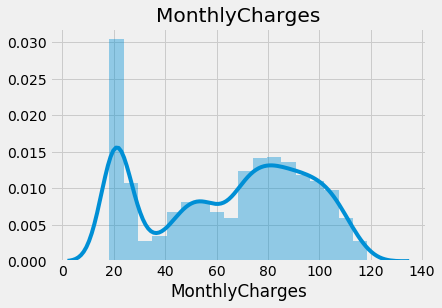

In [45]:
explore_numeric(data, 'MonthlyCharges');


From the graph, the minimum monthly charge is 18.25, maximum is 118.75 and the average monthly charge being 64.76. Most customers monthly charge is between 18 and 25. 

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64
Text(0.5, 1.0, 'tenure')


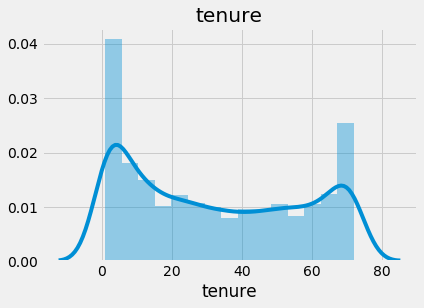

In [46]:
explore_numeric(data, 'tenure');

The minimum tenure is 0, maximum is 72 and the mean being 32. This means we have freshers and oldies on the organization. Most of the customers are freshers wheras a good number of them have are citizens of the company

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64
Text(0.5, 1.0, 'TotalCharges')


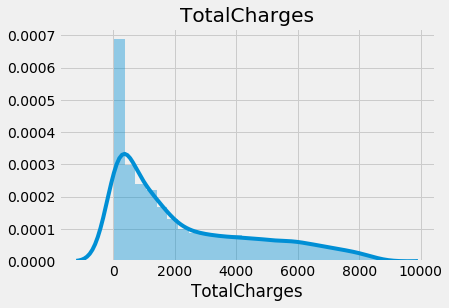

In [47]:
explore_numeric(data, 'TotalCharges');

#### Relationship between the numerical variables and the target variable

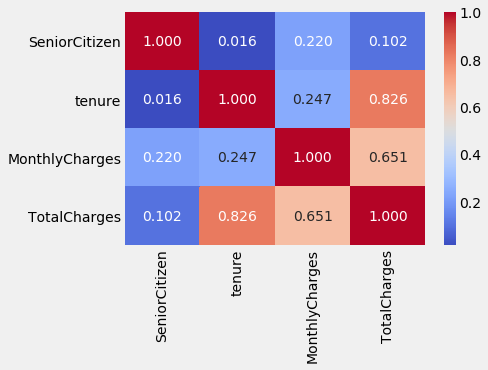

In [48]:
sns.heatmap(numerical.corr(), cmap='coolwarm', annot=True, fmt='.3f');

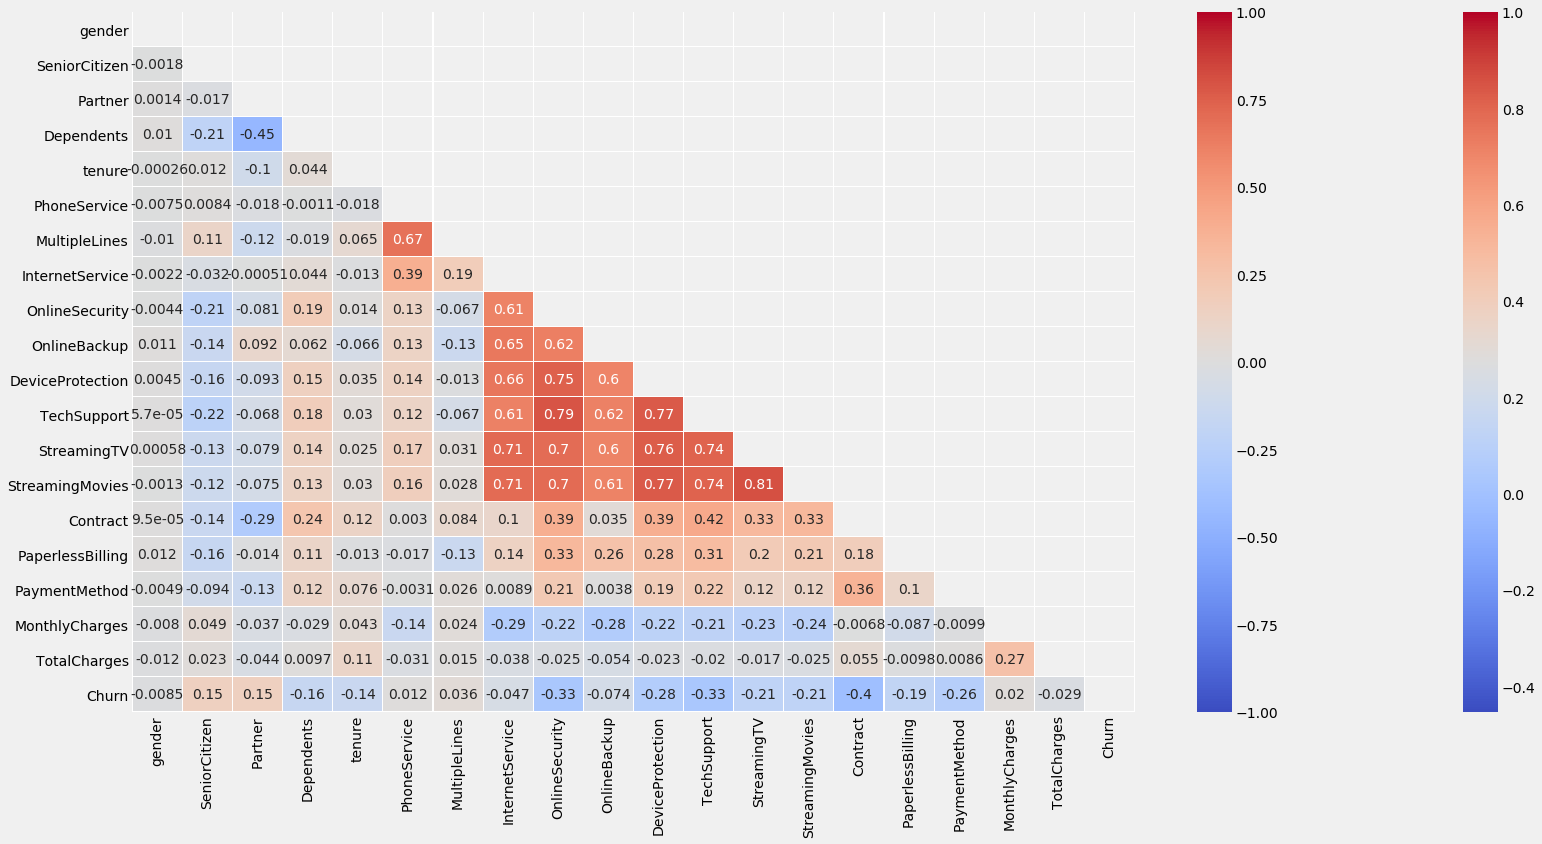

In [49]:
plt.figure(figsize=(25,12))
corr = data.apply(lambda x: pd.factorize(x)[0]).corr()
sns.heatmap(corr,annot=corr,cmap='coolwarm',fmt='.3f',mask=True)
mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)


From the correlation matrix, StreamingMovies is highly correlated with StreamingTv, StreamingMovies and DeviceProtection, InternetService, OnlineSecurity. Likewise, StreamingTv is also highly correlated with InternetService, OnlineSecurity, DeviceProtection and TechSupport. Again, TechSupport is also highly correlated with OnlineSecurity and DeviceProtection.

To avoid the problem of multicollinearity, StreamingTv, StreamingMovies and TechSupport will be dropped.

### Data Preprocessing
Here we try to process the data such as converting categorical variables to numerical, filling in missisng values so that the machine learning model will be able to process the data and make predictions

To avoid redundancy and dimensionality, some columns that have similar sense of information will be merged 

In [50]:
#converting categorical variables to numerical
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
le=LabelEncoder()

we will use one hot encoder since it does not rank the categories. The label encoder ranks the variables in such a way that one is better than the other. If we have only two categories, we can proceed with the label encoding


In [51]:
#dropping the gender column since it has no relationship with the target variable
data = data.drop(columns=['DeviceProtection','gender','PhoneService','StreamingTV',\
                          'StreamingMovies', 'TechSupport' ], axis = 1)
data.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No phone service,DSL,No,Yes,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,No,DSL,Yes,No,One year,No,Mailed check,56.95,1889.50,No
2,0,No,No,2,No,DSL,Yes,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,No phone service,DSL,Yes,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,No,Fiber optic,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [52]:
# let us morge some features that have similar sense of information to avoid redundancy
data = data.replace(to_replace={'MultipleLines':{'No phone service':'No'},  'OnlineSecurity':{'No internet service':'No'},
             'OnlineBackup':{'No internet service':'No'}, 'Contract':{'One year':'One Year and Above', 
             'Two year':'One Year and Above'}, 'PaymentMethod':{'Electronic check':'Check','Mailed check':'Check',
            'Bank transfer (automatic)':'Automatic Transfer','Credit card (automatic)':'Automatic Transfer'}})

In [53]:
y = data['Churn']
X = data.drop('Churn', axis=1)

In [54]:
# Encoding the predictors
X = pd.get_dummies(X, columns=['SeniorCitizen', 
                                  'Partner',
                                  'Dependents',
                                  'MultipleLines',
                                  'InternetService', 
                                  'OnlineSecurity',
                                  'OnlineBackup',
                                  'Contract',
                                  'PaperlessBilling',
                                  'PaymentMethod',
                                  ], drop_first=True)

In [55]:
y=data['Churn'].map({'Yes':1, "No":0})

### Predictive Modelling

In [56]:
#importing required models 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import f1_score, roc_auc_score, classification_report, confusion_matrix 
from sklearn.svm import SVC
#from sklearn.xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score 


In [57]:
#splitting data into test and train 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [58]:
#kfold cross validation 
from sklearn.model_selection import KFold
cv=KFold(n_splits=5,random_state=0)

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [59]:
cv = KFold(n_splits=10,  random_state=1)


### 1. Logistic Regression 

**Here I will try apply hyperparameter tuning on the algorithms and figure out the best parameters to feed the model. Another approach too is to build the baseline model with the default parameters, get the best algorithm and apply the hyperarameter tunning to get the best parameters** 

In [60]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=42)
param_grid={'C':[0.01, 0.05, 0.5,1, 5,10,50,100]}
lr_grid=GridSearchCV(lr, param_grid=param_grid,cv=cv)
lr_grid.fit(X_train, y_train)
print('Logistic Regression CV score is {}'.format(lr_grid.best_score_))
print('Logistic Regression best parameters is {}'.format(lr_grid.best_params_))

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Logistic Regression CV score is 0.8002927159089035
Logistic Regression best parameters is {'C': 10}


C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [61]:
#fitting the logistic regression again with the hyperparametized values
lr=LogisticRegression(C=10, random_state=42)
lr.fit(X_train, y_train)
lr_pred=lr.predict(X_test)
#lets use the test and train score to test if our model is fitting well
print('Train score is {:.3f}'.format(lr.score(X_train, y_train)))
print('Test score is {:.3f}'.format(lr.score(X_test, y_test)))
print('F1 score for logistic regression is {:.3f}'.format(f1_score(lr_pred, y_test)))
print('ROC score for logistic regression is {:.3f}'.format(roc_auc_score(lr_pred, y_test)))
lr_train=lr.score(X_train, y_train)
lr_test=lr.score(X_test, y_test)
lr_roc=roc_auc_score(lr_pred, y_test)
lr_f1=f1_score(lr_pred, y_test)

Train score is 0.802
Test score is 0.797
F1 score for logistic regression is 0.586
ROC score for logistic regression is 0.741


I decided to perform hyperparameter tuning to the model and get the best parameters to fit in the model. I can equally build the base model, look at the performance and then apply hyperparameter to optimize the model

In [62]:
#classification report 
print(classification_report(lr_pred, y_test))

              precision    recall  f1-score   support

           0       0.89      0.84      0.87      1636
           1       0.54      0.64      0.59       474

    accuracy                           0.80      2110
   macro avg       0.71      0.74      0.73      2110
weighted avg       0.81      0.80      0.80      2110



In [63]:
confusion_matrix(lr_pred, y_test)

array([[1378,  258],
       [ 171,  303]], dtype=int64)

**Since our data is not balanced, we therefore cannot use the accuracy score as our evluation metrics. we either use f1 score or ROC score. I used the accuracy score for the test and train just to check for overfitting/underfitting.** 


### 2. SVM

In [64]:
#using the pipeline to build the support vector machine 
svc = SVC()
#pipe=make_pipeline([('Scaler', MinMaxScaler()), ('KNN', KNeighborsClassifier())])
pipe = Pipeline([('Scaler', MinMaxScaler()),('svm', svc)])

param_grid = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100, 200],'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
sv_grid=GridSearchCV(pipe, param_grid=param_grid, cv=cv)
sv_grid.fit(X_train, y_train)
print('SVM best CV score is {}'.format(sv_grid.best_score_))
print('SVM best parameters are {}'.format(sv_grid.best_params_))
#NB; I am using the pipeline for this with the scaling because i dont want the data to be scaled for all the data
# to prevent information leakage. I therefore fit the scaler in the pipeline 

SVM best CV score is 0.7954146671284157
SVM best parameters are {'svm__C': 100, 'svm__gamma': 0.01}


In [65]:
#fitting the svm with the hyperparameters
sv=Pipeline([('Scaler', MinMaxScaler()), ('SVC', SVC(C=200, gamma=0.01))])
sv.fit(X_train, y_train)
print('Train accuracy: {:.3f}'.format(sv.score(X_train,y_train)))
print('Test accuracy: {:.3f}'.format(sv.score(X_test,y_test)))


Train accuracy: 0.801
Test accuracy: 0.793


In [66]:
sv_pred=sv.predict(X_test)
print('ROC score for SVM is {:.3f}%'.format(roc_auc_score(sv_pred, y_test)*100))
print('F1 score for SVM is {:.3f}'.format(f1_score(sv_pred, y_test)*100))


ROC score for SVM is 73.896%
F1 score for SVM is 55.087


In [67]:
sv_train=sv.score(X_train, y_train)
sv_test=sv.score(X_test, y_test)
sv_roc=roc_auc_score(sv_pred, y_test)
sv_f1=f1_score(sv_pred, y_test)

## 3. KNN


In [68]:
#base mode for knn
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred=knn.predict(X_test)
print('Train SCore {:.3f}'.format(knn.score(X_train, y_train)))
print('Test SCore {:.3f}'.format(knn.score(X_test, y_test)))

Train SCore 0.829
Test SCore 0.755


#### Hyperparameter Tuning KNN

In [69]:
k_range = list(range(1,31))
parameters = {'n_neighbors':k_range,
              'leaf_size':[1,3,5],
              'algorithm':['auto', 'kd_tree'],
              'weights': ["uniform", "distance"],}

#Fit the model
gs_knn = GridSearchCV(knn, param_grid=parameters,n_jobs=-1,verbose=2, cv=cv)
gs_knn.fit(X_train,y_train)

# predict
best_knn=gs_knn.best_estimator_

scores = gs_knn.score(X_test,y_test)
print("test score:",scores)
print("best parameters: ",gs_knn.best_params_)
print("best train score: ", gs_knn.best_score_)


Fitting 10 folds for each of 360 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 1196 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 2328 tasks      | elapsed:   22.1s


test score: 0.7734597156398104
best parameters:  {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 15, 'weights': 'uniform'}
best train score:  0.7885115189894292


[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed:   31.6s finished


In [70]:
#fitting the logistic regression with the hyperparamitized values
knn=KNeighborsClassifier(algorithm='auto', leaf_size=5, n_neighbors=17, weights='uniform')
knn.fit(X_train, y_train)
knn_pred=knn.predict(X_test)
print(roc_auc_score(knn_pred, y_test))

0.7215865010066261


In [71]:
knn_train=knn.score(X_train, y_train)
knn_test=knn.score(X_test, y_test)
knn_roc=roc_auc_score(knn_pred, y_test)
knn_f1=f1_score(knn_pred, y_test)

### 4. Decision Tree With Grid Search and Cross Validation

In [72]:

#instatiating the model
dt=DecisionTreeClassifier()
param_grid={'max_features':np.arange(1,10), 'max_leaf_nodes':[1,2,3, 4,5, 6,7,8]}
dt_grid=GridSearchCV(dt, param_grid=param_grid, cv=cv)
dt_grid.fit(X_train, y_train)
print('Decision tree CV score is {}'.format(dt_grid.best_score_))
print('Best parameters are {}'.format(dt_grid.best_params_))

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: F

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: F

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: F

Decision tree CV score is 0.7901346493180956
Best parameters are {'max_features': 9, 'max_leaf_nodes': 8}


In [73]:
#now fitting the decision tree model with the correct parameters
dt=DecisionTreeClassifier(max_features=7, max_leaf_nodes=7, random_state=42)
dt.fit(X_train, y_train)
dt_pred=dt.predict(X_test)
print('The F1 score is {}'.format(f1_score(dt_pred, y_test)))
print('ROC score for decision tree is {}'.format(roc_auc_score(dt_pred, y_test)))

The F1 score is 0.4724576271186441
ROC score for decision tree is 0.6932651589484171


In [74]:
#confusion matrix
confusion_matrix(dt_pred, y_test)

array([[1389,  338],
       [ 160,  223]], dtype=int64)

In [75]:
#lets use the test and train score to test if our model is fitting well
print('Train score is {}'.format(dt.score(X_train, y_train)))
print('Test score is {}'.format(dt.score(X_test, y_test)))

Train score is 0.78992279561154
Test score is 0.7639810426540284


In [76]:
dt_train=dt.score(X_train, y_train)
dt_test=dt.score(X_test, y_test)
dt_roc=roc_auc_score(dt_pred, y_test)
dt_f1=f1_score(dt_pred, y_test)

### 5. Random Forest

In [77]:
rf=RandomForestClassifier(random_state=42)
param_grid={'max_depth':np.arange(10), 'max_features':np.arange(8)}
rf_grid=GridSearchCV(rf, param_grid, cv=cv)
rf_grid.fit(X_train, y_train)
print('The random forest CV score is {}'.format(rf_grid.best_score_))
print('The random forest best parameters score is {}'.format(rf_grid.best_params_))

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The

The random forest CV score is 0.8023260607859628
The random forest best parameters score is {'max_depth': 6, 'max_features': 5}


In [78]:
#fitting the random forest 
rf=RandomForestClassifier(random_state=42, max_features=3, max_depth=5)
rf.fit(X_train, y_train)
rf_pred=rf.predict(X_test)
print('F1 score for Randome Forest is {:.3f}'.format(f1_score(rf_pred, y_test)))
print('ROC score for Random Foresr is {:.3f}'.format(roc_auc_score(rf_pred, y_test)))

F1 score for Randome Forest is 0.516
ROC score for Random Foresr is 0.740


In [79]:
#lets use the test and train score to test if our model is fitting well
print('Train score is {}'.format(rf.score(X_train, y_train)))
print('Test score is {}'.format(rf.score(X_test, y_test)))

Train score is 0.8075985371800082
Test score is 0.7895734597156399


In [80]:
rf_train=rf.score(X_train, y_train)
rf_test=rf.score(X_test, y_test)
rf_roc=roc_auc_score(rf_pred, y_test)
rf_f1=f1_score(rf_pred, y_test)

### 6. AdaBoost Classifier 

In [81]:
dt=DecisionTreeClassifier(max_features=8, max_leaf_nodes=4, random_state=42)
adb = AdaBoostClassifier(base_estimator=dt,n_estimators=150,random_state=0)
adb.fit(X_train, y_train)
print('Train score is {}'.format(adb.score(X_train, y_train)))
print('Test score is {}'.format(adb.score(X_test, y_test)))

Train score is 0.8624542868752539
Test score is 0.7507109004739336


In [82]:
adb_pred=adb.predict(X_test)
print('The F1 score is {}'.format(f1_score(adb_pred, y_test)))
print('ROC score for Adaboost is {}'.format(roc_auc_score(adb_pred, y_test)))

The F1 score is 0.49904761904761896
ROC score for Adaboost is 0.6756666401738934


In [83]:
adb_train=adb.score(X_train, y_train)
adb_test=adb.score(X_test, y_test)
adb_roc=roc_auc_score(adb_pred, y_test)
adb_f1=f1_score(adb_pred, y_test)

## 7. Gradient Boosting

In [84]:
gb=GradientBoostingClassifier(random_state=0)
param_grid={'n_estimators':[50,100,200,300], 'max_depth':np.arange(5)}
gb_grid=GridSearchCV(gb, param_grid=param_grid, cv=cv)
gb_grid.fit(X_train, y_train)
print('The Gradient Boosting CV score is {}'.format(gb_grid.best_score_))
print('The Gradient Boosting best parameters score is {}'.format(gb_grid.best_params_))


C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score

The Gradient Boosting CV score is 0.8041536799749336
The Gradient Boosting best parameters score is {'max_depth': 2, 'n_estimators': 100}


In [85]:
#using the hyperparameters to instatiate our model
gb=GradientBoostingClassifier(max_depth = 1, n_estimators=200)
gb.fit(X_train, y_train)
print('Train score is {}'.format(gb.score(X_train, y_train)))
print('Test score is {}'.format(gb.score(X_test, y_test)))

Train score is 0.8086143843965867
Test score is 0.7914691943127962


In [86]:
gb_pred=gb.predict(X_test)
print('The F1 score is {}'.format(f1_score(gb_pred, y_test)))
print('ROC score for Adaboost is {}'.format(roc_auc_score(gb_pred, y_test)))

The F1 score is 0.5528455284552846
ROC score for Adaboost is 0.7358579934725428


In [87]:
gb_train=gb.score(X_train, y_train)
gb_test=gb.score(X_test, y_test)
gb_roc=roc_auc_score(gb_pred, y_test)
gb_f1=f1_score(gb_pred, y_test)

### 8. XGB

In [88]:
#base model 
import xgboost
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train, y_train)
print('Train score is {}'.format(xgb.score(X_train, y_train)))
print('Test score is {}'.format(xgb.score(X_test, y_test)))

C:\Users\Owner\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:52:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train score is 0.9221861032100772
Test score is 0.7805687203791469


#### Hyperparameter Tuning the XGB

In [89]:

param_grid={'n_estimators':[50,100,200,300], 'max_depth':np.arange(9), 'n_estimators': [50,100,115,130,150]}
xgb_grid=GridSearchCV(xgb, param_grid, cv=cv)
xgb_grid.fit(X_train, y_train)
print('The XGBoost CV score is {}'.format(xgb_grid.best_score_))
print('The XGBoost best parameters score is {}'.format(xgb_grid.best_params_))


[15:52:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:52:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:52:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:52:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:52:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:52:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:52:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:52:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:52:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:52:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:52:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:52:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:52:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:52:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:52:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:52:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:52:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:52:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:52:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:52:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:52:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:52:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:52:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:52:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:53:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:53:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:53:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:53:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:53:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:53:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:53:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:53:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:53:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:53:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:53:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:53:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:53:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:53:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:53:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:53:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:53:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:53:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:53:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:53:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:53:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:53:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:53:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:53:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:53:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:53:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:53:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:53:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:54:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:54:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:54:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:54:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:54:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:54:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:54:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:54:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:54:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:54:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:54:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:54:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:54:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:54:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:54:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:54:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [90]:
xgb=GradientBoostingClassifier(n_estimators=150, max_depth=1)
xgb.fit(X_train, y_train)
print('Train score is {}'.format(xgb.score(X_train, y_train)))
print('Test score is {}'.format(xgb.score(X_test, y_test)))

Train score is 0.8073953677366924
Test score is 0.7919431279620853


In [91]:
xgb_pred=xgb.predict(X_test)
print('The F1 score is {}'.format(f1_score(xgb_pred, y_test)))
print('ROC score for Adaboost is {}'.format(roc_auc_score(xgb_pred, y_test)))

The F1 score is 0.5431841831425599
ROC score for Adaboost is 0.7385307017543858


In [92]:
xgb_train=xgb.score(X_train, y_train)
xgb_test=xgb.score(X_test, y_test)
xgb_roc=roc_auc_score(xgb_pred, y_test)
xgb_f1=f1_score(xgb_pred, y_test)

### Model Evaluation Scores

In [93]:
from sklearn.metrics import f1_score, roc_auc_score, classification_report, confusion_matrix 

In [94]:
models = ["Logistic Regression", "SVC", "Random Forest", "Decision Tree", 'Gradient Boosting', 'AdaBoost', 'KNN', 'XGB']
train=[lr_train, sv_train, rf_train, dt_train, gb_train, adb_train, knn_train, xgb_train]
test=[lr_test, sv_test, rf_test, dt_test, gb_test, adb_test, knn_test, xgb_test]
f1=[lr_f1, sv_f1, rf_f1, dt_f1, gb_f1, adb_f1, knn_f1, xgb_f1]
roc=[lr_roc, sv_roc, rf_roc, dt_roc, gb_roc, adb_roc, knn_roc, xgb_roc]

In [95]:
metrics = {"Model" : models, "Train Score": train, "Test Score" : test, "F1 Score": f1, 'ROC Score':roc}
my_models = pd.DataFrame(metrics)
my_models

,Model,Train Score,Test Score,F1 Score,ROC Score
0,Logistic Regression,0.801707,0.796682,0.585507,0.740769
1,SVC,0.800691,0.792891,0.550874,0.738965
2,Random Forest,0.807599,0.789573,0.516340,0.739520
3,Decision Tree,0.789923,0.763981,0.472458,0.693265
4,Gradient Boosting,0.808614,0.791469,0.552846,0.735858
5,AdaBoost,0.862454,0.750711,0.499048,0.675667
6,KNN,0.803129,0.779147,0.489035,0.721587
7,XGB,0.807395,0.791943,0.543184,0.738531


In [96]:
my_models.sort_values(by = "ROC Score", ascending= False, ignore_index = True)

,Model,Train Score,Test Score,F1 Score,ROC Score
0,Logistic Regression,0.801707,0.796682,0.585507,0.740769
1,Random Forest,0.807599,0.789573,0.516340,0.739520
2,SVC,0.800691,0.792891,0.550874,0.738965
3,XGB,0.807395,0.791943,0.543184,0.738531
4,Gradient Boosting,0.808614,0.791469,0.552846,0.735858
5,KNN,0.803129,0.779147,0.489035,0.721587
6,Decision Tree,0.789923,0.763981,0.472458,0.693265
7,AdaBoost,0.862454,0.750711,0.499048,0.675667


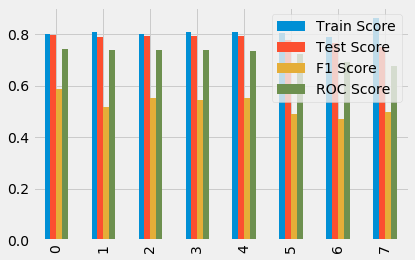

In [97]:
my_models.sort_values(by = "ROC Score", ascending= False, ignore_index = True).plot.bar(label='Model');

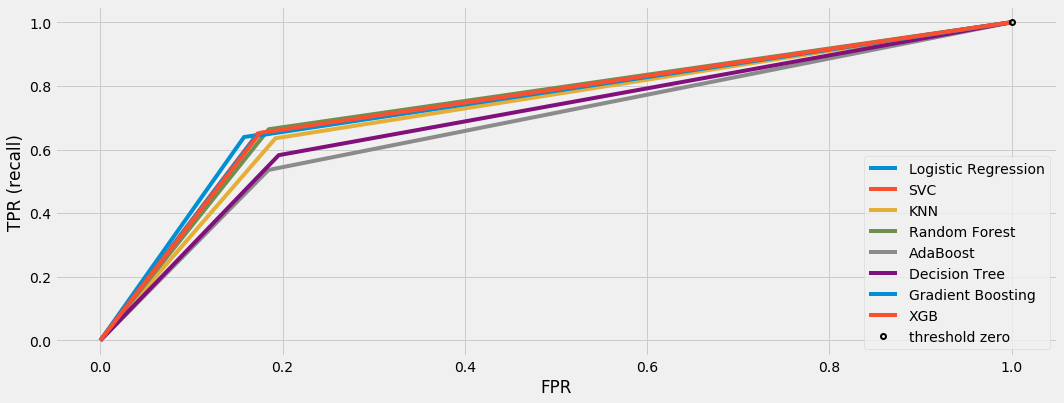

In [98]:
#plotting a grapgh to see how the algorithms are faring the the ROC 
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, sv_pred)
fpr_lr, tpr_lr, thresholds_sv=roc_curve(lr_pred, y_test)
fpr_sv, tpr_sv, thresholds_sv=roc_curve(sv_pred, y_test)
fpr_knn, tpr_knn, thresholds_knn=roc_curve(knn_pred, y_test)
fpr_rf, tpr_rf, thresholds_rf=roc_curve(rf_pred, y_test)
fpr_adb, tpr_adb, thresholds_adb=roc_curve(adb_pred, y_test)
fpr_dt, tpr_dt, thresholds_dt=roc_curve(dt_pred, y_test)
fpr_gb, tpr_gb, thresholds_gb=roc_curve(gb_pred, y_test)
fpr_xgb, tpr_xgb, thresholds_xgb=roc_curve(xgb_pred, y_test)

#plotting the graphs 
plt.figure(figsize=(16,6))
plt.plot(fpr_lr, tpr_lr, label="Logistic Regression")
plt.plot(fpr_sv, tpr_sv, label="SVC")
plt.plot(fpr_knn, tpr_knn, label="KNN")
plt.plot(fpr_rf, tpr_rf, label="Random Forest") 
plt.plot(fpr_adb, tpr_adb, label="AdaBoost") 
plt.plot(fpr_dt, tpr_dt, label="Decision Tree") 
plt.plot(fpr_gb, tpr_gb, label="Gradient Boosting") 
plt.plot(fpr_xgb, tpr_xgb, label="XGB") 


plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=5,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.show()

From the results of the 8 models,Random Forest, Gradient Boosting and XGBoostgave the best results for ROC (74%). we using ROC because our data is not balanced and ROC is the measure of the ability to distinguish between classes. we can equally use the f1 score which is the harmonic mean of the precision and recall. 

In [99]:
def plot_feature_importance(importance,names,model_type):
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

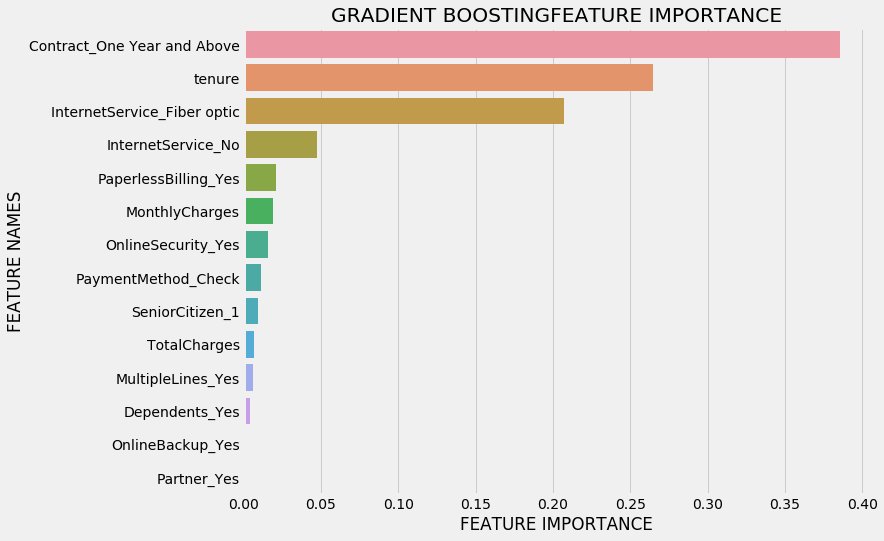

In [100]:
plot_feature_importance(gb.feature_importances_,X.columns,'GRADIENT BOOSTING')


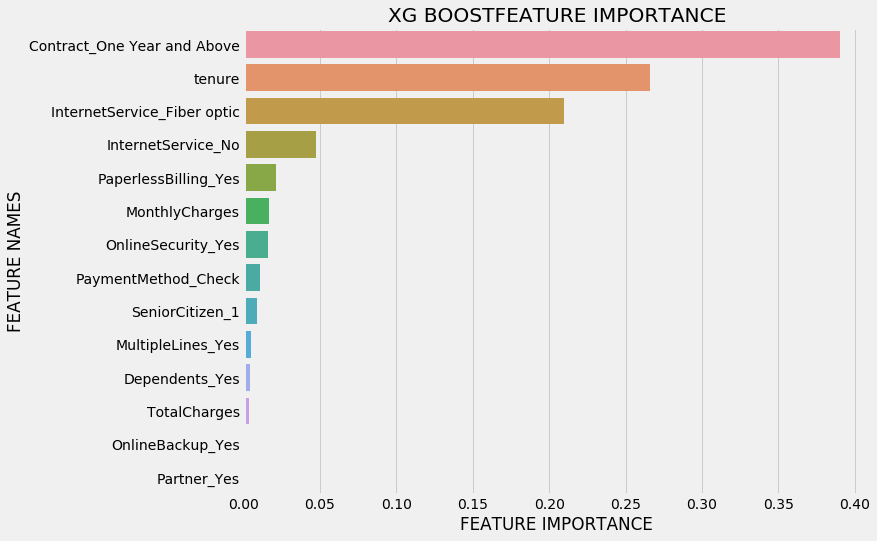

In [101]:
plot_feature_importance(xgb.feature_importances_,X.columns,'XG BOOST')


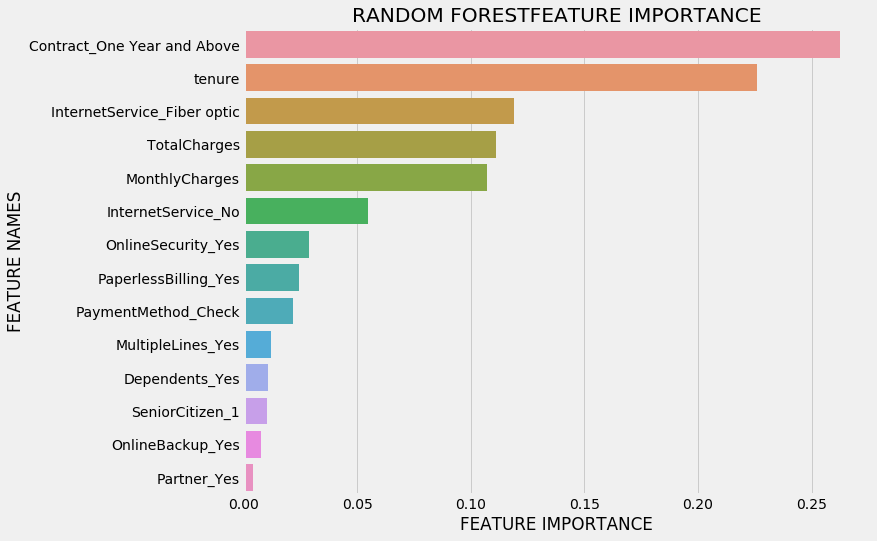

In [102]:
plot_feature_importance(rf.feature_importances_,X.columns,'RANDOM FOREST')


### Saving The Final Model

In [103]:
import pickle
#saving and storing the data for deployment with streamlit
#open a file want to store the data
file=open('Churn.pkl','wb')
##dump that file 
pickle.dump(lr,file)
model=pickle.load(open('Churn.pkl','rb'))

EOFError: Ran out of input

### Conclusion

So we are able to predict customer churn in the telecom industry based on historical data of customers using machine learning techniques. We discovered a whole lot of insigtful informations about customers which has been discussed already in the EDA. 
A couple of algorithms were used for this prediction but Logistic Regression gave us the best accuracy. we also performed hyperparameter tuning to help optimize the model to achieve the best performance. 
Logistic Regression gave us an accuracy of 74% and a minimum distance between train and test score which is quite ok for our analysis. 
For the best predictors, we discovered that, attributes such as customers who has a contract of one year or more are high predictors of customer churn. Also the number of years spent in the telcom and the usage of inteernet services are good predictors of customer churn